# Properties of virtual vectors

Created 06/04/2024

Objectives:
* Explore and construct hypotheses around observations made in the transfer_matrix_class notebook.
* Test hypotheses across multiple wavefunctions and widths of the symmetry operation interval.
* What can be said about the left and right projected states of the bulk symmetry operation? Seems we can get extra information based by keeping the upper and lower legs separate.
    * How does the gauge impact this? Can include schmidt terms or not.
    * How does this relate to the principal eigenvector Pollman constructs to find a projective representation of the symmetry group?
    * How do these properties depend on the bond dimension?
* There are degeneracies in the schmidt terms. Is this just Pollman's entanglement entropy degeneracy? Does this impact the other observations?
* When acting with the transfer matrices derived from unitaries on these states, are there extra requirements?
    * Vector norm less than or equal to one?
    * Is there only a subspace of the entire space accessible?
    * Compare transfer matrices from unitaries with more general operators. What properties do transfer matrices from unitaries have?

# Package imports

In [149]:
from functools import reduce

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import h5py
from tenpy.tools import hdf5_io
import tenpy
import tenpy.linalg.np_conserved as npc

import os

In [154]:
from SPTOptimization.utils import (
    get_transfer_matrices_from_unitary_list,
    multiply_transfer_matrices,
    to_npc_array
)

# Load data

In [4]:
DATA_DIR = r"data/transverse_cluster_200_site_dmrg"

In [5]:
loaded_data = list()

for local_file_name in os.listdir(DATA_DIR):
    f_name = r"{}/{}".format(DATA_DIR, local_file_name, ignore_unknown=False)
    with h5py.File(f_name, 'r') as f:
        data = hdf5_io.load_from_hdf5(f)
        loaded_data.append(data)

In [6]:
b_parameters = sorted(list(d['paramters']['B'] for d in loaded_data))

In [7]:
psi_dict = dict()

In [8]:
for b in b_parameters:
    psi = next(
        d['wavefunction']
        for d in loaded_data
        if d['paramters']['B'] == b
    )

    rounded_b = round(b, 1)
    psi_dict[rounded_b] = psi

In [9]:
list(psi_dict)

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0]

In [10]:
test_psi = psi_dict[0.5]

# Definitions

In [11]:
np_I = np.array([[1,0],[0,1]])
np_X = np.array([[0,1],[1,0]])
np_Y = np.array([[0,-1j],[1j,0]])
np_Z = np.array([[1,0],[0,-1]])

In [12]:
def get_symmetry_tm(psi, symmetry_operations):
    index = (psi.L - len(symmetry_operations))//2

    tms = get_transfer_matrices_from_unitary_list(
        psi,
        symmetry_operations,
        index
    )

    transfer_matrix = reduce(
        multiply_transfer_matrices,
        tms
    )

    np_transfer_matrix = (
        transfer_matrix
        .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
        .to_ndarray()
    )

    return np_transfer_matrix

# Code

## Schmidt values

In [13]:
SR_values = [psi.get_SR(100) for psi in psi_dict.values()]

Increase B until critical point (SPT phase)

In [14]:
SR_values[0]

array([0.70710678, 0.70710678])

In [15]:
SR_values[2]

array([7.07102179e-01, 7.07102179e-01, 1.80398424e-03, 1.80398424e-03,
       1.80398424e-03, 1.80398424e-03, 4.60238879e-06, 4.60238879e-06])

In [16]:
SR_values[4]

array([7.07022994e-01, 7.07022994e-01, 7.69671387e-03, 7.69671387e-03,
       7.69671387e-03, 7.69671387e-03, 8.37870972e-05, 8.37870972e-05])

In [17]:
SR_values[6]

array([7.06564503e-01, 7.06564503e-01, 1.95743348e-02, 1.95743348e-02,
       1.95743348e-02, 1.95743348e-02, 5.42278277e-04, 5.42278277e-04])

In [18]:
SR_values[8]

array([0.7044495 , 0.70443499, 0.04332492, 0.04332492, 0.04332402,
       0.04332402, 0.00266456, 0.00266451])

In [19]:
SR_values[9]

array([0.70341105, 0.69848145, 0.06592236, 0.06591902, 0.06546036,
       0.06545705, 0.00617781, 0.00613451])

Critical point

In [20]:
SR_values[10]

array([0.89538113, 0.40599408, 0.15866992, 0.06737791, 0.05457546,
       0.02441625, 0.01049789, 0.00778904])

Continue increasing B (trivial phase)

In [21]:
SR_values[11]

array([0.90859608, 0.28759973, 0.28757468, 0.09101176, 0.01856608,
       0.01855351, 0.00587403, 0.00581269])

In [22]:
SR_values[13]

array([0.94755227, 0.22269151, 0.22269149, 0.05233448, 0.01027601,
       0.01027562, 0.00241477, 0.00240155])

In [23]:
SR_values[15]

array([0.9646692 , 0.18451223, 0.18451223, 0.03529132, 0.00614738,
       0.00614728, 0.00117573, 0.00117247])

In [24]:
SR_values[17]

array([9.74172204e-01, 1.58571627e-01, 1.58571627e-01, 2.58115448e-02,
       3.97020923e-03, 3.97017911e-03, 6.46226331e-04, 6.45246442e-04])

In [25]:
SR_values[20]

array([9.82343696e-01, 1.31678800e-01, 1.31678800e-01, 1.76509457e-02,
       2.29198365e-03, 2.29197709e-03, 3.07223721e-04, 3.07005852e-04])

### Conclusions
* There is a natrual (2,4,2) grouping of the schmidt values in the non-trivial phase. Not sure about the 4 group but regardless of bond dimension (provided it's even...) can we conclude that there is a general two fold degeneraxy?
    * This degeneracy breaks down as we approach the critical point. This could be due to numerical errors due to the long correlation length.
* In the non-trivial phase, the largest two schmidt values dominate for low B, resulting in a value of $2^{-1/2}$. The lower values increase with incresing B. Makes sense, a more complicated state needs a higher effective bond dimension.
* In the "trivial" phase:
    * The largest schmidt value is unique and tends to 1 with increasing B.
    * There is a natural (1, 2, 1, 2, 2) grouping. Weird!

## Transfer matrix singular values and eigenvalues

In [26]:
symmetry_ops = [
    [np_I, np_I]*40,
    [np_X, np_I]*40,
    [np_I, np_X]*40,
    [np_X, np_X]*40
]

### B normalisation
Calcualte the transfer matrices (in the "B" normalisation).

In [27]:
symmetry_tms = [
    [get_symmetry_tm(psi, ops) for ops in symmetry_ops]
    for psi in psi_dict.values()
]   

In [28]:
def singular_and_eigen_values(transfer_matrix, smallest=1e-4, num_digits=6):
    singular_values = np.linalg.svd(transfer_matrix).S
    filtered_singular_values = np.round(
        singular_values[singular_values >= smallest],
        num_digits
    )

    eigen_values = np.linalg.eig(transfer_matrix).eigenvalues
    filtered_eigen_values = np.round(
        eigen_values[np.abs(eigen_values) >= smallest],
        num_digits
    )

    return (filtered_singular_values, filtered_eigen_values)

#### B=0

In [29]:
index=0

In [30]:
(
    singular_and_eigen_values(symmetry_tms[index][0]),
    singular_and_eigen_values(symmetry_tms[index][1]),
    singular_and_eigen_values(symmetry_tms[index][2]),
    singular_and_eigen_values(symmetry_tms[index][3])
)

((array([1.]), array([1.+0.j])),
 (array([1.]), array([0.990918+0.j])),
 (array([1.]), array([-0.990918+0.j])),
 (array([1.]), array([-1.+0.j])))

#### B=0.1

In [99]:
index=1

In [100]:
(
    singular_and_eigen_values(symmetry_tms[index][0]),
    singular_and_eigen_values(symmetry_tms[index][1]),
    singular_and_eigen_values(symmetry_tms[index][2]),
    singular_and_eigen_values(symmetry_tms[index][3])
)

((array([1.999998]), array([1.+0.j])),
 (array([1.999998]), array([-0.242457+0.j])),
 (array([1.999998]), array([-0.242457+0.j])),
 (array([1.999998]), array([1.+0.j])))

#### B=0.2

In [31]:
index=2

In [32]:
(
    singular_and_eigen_values(symmetry_tms[index][0]),
    singular_and_eigen_values(symmetry_tms[index][1]),
    singular_and_eigen_values(symmetry_tms[index][2]),
    singular_and_eigen_values(symmetry_tms[index][3])
)

((array([1.999974]), array([1.+0.j])),
 (array([1.999974]), array([-0.626357+0.j])),
 (array([1.999974]), array([-0.626365+0.j])),
 (array([1.999974]), array([0.999984+0.j])))

#### B=0.4

In [33]:
index=4

In [34]:
(
    singular_and_eigen_values(symmetry_tms[index][0]),
    singular_and_eigen_values(symmetry_tms[index][1]),
    singular_and_eigen_values(symmetry_tms[index][2]),
    singular_and_eigen_values(symmetry_tms[index][3])
)

((array([1.999526]), array([1.+0.j])),
 (array([1.999526]), array([0.122726+0.j])),
 (array([1.999526]), array([-0.12273+0.j])),
 (array([1.999526]), array([-0.999989+0.j])))

#### B=0.5

In [35]:
index=5

In [36]:
(
    singular_and_eigen_values(symmetry_tms[index][0]),
    singular_and_eigen_values(symmetry_tms[index][1]),
    singular_and_eigen_values(symmetry_tms[index][2]),
    singular_and_eigen_values(symmetry_tms[index][3])
)

((array([1.998715]), array([1.+0.j])),
 (array([1.998715]), array([-0.000366+0.j])),
 (array([1.998715]), array([-0.000366+0.j])),
 (array([1.998715]), array([0.999357+0.j])))

#### B=0.7

In [37]:
index=7
smallest = 1e-6

In [38]:
(
    singular_and_eigen_values(symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][3], smallest=smallest)
)

((array([1.99316]), array([1.+0.j])),
 (array([1.99316]), array([0.000252+0.j])),
 (array([1.99316]), array([-0.000251+0.j])),
 (array([1.99316]), array([-0.99316+0.j])))

#### B=0.9

In [39]:
index=9
smallest = 1e-4

In [40]:
(
    singular_and_eigen_values(symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][3], smallest=smallest)
)

((array([1.966918e+00, 3.730000e-04, 3.720000e-04]), array([1.+0.j])),
 (array([1.966716e+00, 3.730000e-04, 3.720000e-04]), array([0.040828-0.j])),
 (array([1.963493e+00, 3.730000e-04, 3.720000e-04]), array([0.040825-0.j])),
 (array([1.963291e+00, 3.730000e-04, 3.720000e-04]), array([0.981271-0.j])))

#### B=1.0

In [41]:
index=10
smallest = 1e-4

In [42]:
(
    singular_and_eigen_values(symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][3], smallest=smallest)
)

((array([2.315801, 0.004263]), array([1.      +0.j, 0.001672+0.j])),
 (array([2.315799, 0.004263]), array([0.999999-0.j, 0.001672+0.j])),
 (array([0.160169, 0.135437]), array([0.058347+0.j, 0.081438+0.j])),
 (array([0.160161, 0.135443]), array([0.058349+0.j, 0.081436+0.j])))

#### B=1.1

In [43]:
index=11
smallest = 1e-4

In [44]:
(
    singular_and_eigen_values(symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][3], smallest=smallest)
)

((array([2.35587e+00, 3.78000e-04, 1.55000e-04]),
  array([ 1.00e+00+0.j, -1.67e-04+0.j])),
 (array([2.35587e+00, 3.78000e-04, 1.55000e-04]),
  array([ 9.99909e-01+0.j, -1.67000e-04+0.j])),
 (array([2.35587e+00, 3.78000e-04, 1.55000e-04]),
  array([ 9.99909e-01+0.j, -1.67000e-04+0.j])),
 (array([2.35587e+00, 3.78000e-04, 1.55000e-04]),
  array([ 1.00e+00+0.j, -1.67e-04+0.j])))

#### B=1.5

In [45]:
index=15
smallest = 1e-4

In [46]:
(
    singular_and_eigen_values(symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][3], smallest=smallest)
)

((array([2.635619]), array([1.+0.j])),
 (array([2.635619]), array([1.+0.j])),
 (array([2.635619]), array([1.+0.j])),
 (array([2.635619]), array([1.+0.j])))

#### B=2.0

In [47]:
index=20
smallest = 1e-4

In [48]:
(
    singular_and_eigen_values(symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetry_tms[index][3], smallest=smallest)
)

((array([2.730311]), array([1.+0.j])),
 (array([2.730311]), array([1.+0.j])),
 (array([2.730311]), array([1.+0.j])),
 (array([2.730311]), array([1.+0.j])))

### Symmetric normalisation
Incorporate the schmidt values on the left hand side. Should make the left and right regions symmetric.

In [49]:
def get_symmetric_symmetry_tm(psi, symmetry_operations):
    index = (psi.L - len(symmetry_operations))//2

    tms = get_transfer_matrices_from_unitary_list(
        psi,
        symmetry_operations,
        index
    )

    transfer_matrix = reduce(
        multiply_transfer_matrices,
        tms
    )

    left_leg = psi.get_B(index).legs[0]
    SL = npc.diag(psi.get_SL(index), left_leg, labels = ['vL', 'vR'])
    
    transfer_matrix = npc.tensordot(
        SL,
        transfer_matrix,
        [['vR',],  ['vL',]]
    )
    transfer_matrix = npc.tensordot(
        SL.conj(),
        transfer_matrix,
        [['vR*',],  ['vL*',]]
    )
    
    np_transfer_matrix = (
        transfer_matrix
        .combine_legs([['vL', 'vL*'], ['vR', 'vR*']])
        .to_ndarray()
    )

    return np_transfer_matrix

In [50]:
symmetric_symmetry_tms = [
    [get_symmetric_symmetry_tm(psi, ops) for ops in symmetry_ops]
    for psi in psi_dict.values()
]   

#### B=0

In [51]:
index=0

In [52]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3])
)

((array([0.5]), array([0.5+0.j])),
 (array([0.5]), array([0.495459+0.j])),
 (array([0.5]), array([-0.495459+0.j])),
 (array([0.5]), array([-0.5+0.j])))

#### B=0.2

In [53]:
index=2

In [54]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3])
)

((array([0.499987]), array([0.499987+0.j])),
 (array([0.499987]), array([-0.313174+0.j])),
 (array([0.499987]), array([-0.313174+0.j])),
 (array([0.499987]), array([0.499987+0.j])))

#### B=0.4

In [55]:
index=4

In [56]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3])
)

((array([0.499763]), array([0.499763+0.j])),
 (array([0.499763]), array([0.061354+0.j])),
 (array([0.499763]), array([-0.061354+0.j])),
 (array([0.499763]), array([-0.499763+0.j])))

#### B=0.5

In [57]:
index=5

In [58]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2]),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3])
)

((array([0.499358]), array([0.499358+0.j])),
 (array([0.499358]), array([-0.000183+0.j])),
 (array([0.499358]), array([-0.000183+0.j])),
 (array([0.499358]), array([0.499358+0.j])))

#### B=0.7

In [59]:
index=7
smallest = 1e-6

In [60]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3], smallest=smallest)
)

((array([0.496586]), array([0.496586+0.j])),
 (array([0.496586]), array([0.000125+0.j])),
 (array([0.496586]), array([-0.000125-0.j])),
 (array([0.496586]), array([-0.49658+0.j])))

#### B=0.9

In [61]:
index=9
smallest = 1e-4

In [62]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3], smallest=smallest)
)

((array([0.483596]), array([0.483596+0.j])),
 (array([0.482753]), array([0.020243+0.j])),
 (array([0.482753]), array([0.020243+0.j])),
 (array([0.481912]), array([0.481834+0.j])))

#### B=1.0

In [63]:
index=10
smallest = 1e-4

In [64]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3], smallest=smallest)
)

((array([6.70405e-01, 3.80000e-04]),
  array([6.70405e-01+0.j, 3.80000e-04+0.j])),
 (array([6.70404e-01, 3.80000e-04]),
  array([6.70404e-01+0.j, 3.80000e-04+0.j])),
 (array([0.026992, 0.026135]), array([0.026992+0.j, 0.026135+0.j])),
 (array([0.026982, 0.026145]), array([0.026982+0.j, 0.026144-0.j])))

#### B=1.1

In [65]:
index=11
smallest = 1e-4

In [66]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3], smallest=smallest)
)

((array([0.694509]), array([0.694508+0.j])),
 (array([0.694509]), array([0.694508+0.j])),
 (array([0.694509]), array([0.694508+0.j])),
 (array([0.694509]), array([0.694508+0.j])))

#### B=1.5

In [67]:
index=15
smallest = 1e-4

In [68]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3], smallest=smallest)
)

((array([0.868311]), array([0.868311+0.j])),
 (array([0.868311]), array([0.868311+0.j])),
 (array([0.868311]), array([0.868311+0.j])),
 (array([0.868311]), array([0.868311+0.j])))

#### B=2.0

In [69]:
index=20
smallest = 1e-4

In [70]:
(
    singular_and_eigen_values(symmetric_symmetry_tms[index][0], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][1], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][2], smallest=smallest),
    singular_and_eigen_values(symmetric_symmetry_tms[index][3], smallest=smallest)
)

((array([0.931825]), array([0.931825+0.j])),
 (array([0.931825]), array([0.931825+0.j])),
 (array([0.931825]), array([0.931825+0.j])),
 (array([0.931825]), array([0.931825+0.j])))

### Conclusions
* B gauge
    * Nontrivial phase
        * Dominant singular value is 2 and decreases with B, constant across symmetry operations. Is only 1 for the B=0 phase, implying bond dimension dependence.
        * The eigenvalues of the $II$ and $XX$ transfer matrices are 1. The eigenvalues for $IX$ and $XI$ are typically much smaller, and can change sign. These smaller eigenvalues seem to have an upward parabolic shape wrt B. 
    * Trivial phase
        * Dominant singular values increase with B and are fixed across symmetry operations.
        * The dominant eigenvalue is 1 consistently.
    * In a translationally invariant periodic/infinite system, expect the transfer matrix to have dominant eigenvalue with absolute value 1, and further one can read off a projective representation of the symmetry group from the corresponding eigenvector. This is _not_ what we're seeing in the non-trivial phase, which I find surprising. Is this just an artifact of the finite system size/loss of translation invariance?
* Symmetric gauge
    * Nontrivial phase
        * Dominant singular value is typically 0.5, slightly decreasing with B (although this could be an artifact of increasing correlation length).
        * The eigenvalues of the $II$ and $XX$ transfer matrices agree with the dominant singular value. The eigenvalues for $IX$ and $XI$ are typically much smaller, and can change sign. These smaller eigenvalues seem to have an upward parabolic shape wrt B.    
    * Trivial phase
        * There is a single dominant singular value and eigenvalue, and they agree across all symmetry operations.
        * This value increases with B. Tends towards 1 for perfect product state?

## Symmetry projected states
The dominant singular value and eigenvalue are non-degenerate. So can find eigenvectors and SVD decomposition, and investigate the structure of these vectors wrt the upper and lower legs.

Check how well this approximates the original transfer matrix.

In [71]:
symmetry_tms = [
    [get_symmetry_tm(psi, ops) for ops in symmetry_ops]
    for psi in psi_dict.values()
]   

In [72]:
def reshape_1D_array_to_square(a):
    assert len(a.shape) == 1
    N = len(a)

    sqrt_N = np.sqrt(N)
    assert int(sqrt_N)**2 == N
    sqrt_N = int(sqrt_N)

    return a.reshape((sqrt_N, sqrt_N))

In [103]:
def singular_and_eigen_vectors(transfer_matrix, smallest=1e-3, num_digits=4):
    U, S, Vh = np.linalg.svd(transfer_matrix)
    left_projected_state = U[:, 0]
    right_projected_state = Vh[0]

    svd_approx_tm = S[0]*np.outer(left_projected_state, right_projected_state)
    svd_approx_score = np.linalg.norm(svd_approx_tm - transfer_matrix)

    eig_vals, eig_vecs = np.linalg.eig(transfer_matrix)
    dom_eig_index = np.argmax(np.abs(eig_vals))
    
    dom_eig_vec = eig_vecs[dom_eig_index]
    dom_eig_val = eig_vals[dom_eig_index]
    eig_approx_tm = dom_eig_val*np.outer(dom_eig_vec, dom_eig_vec.conj())
    eig_approx_score = np.linalg.norm(eig_approx_tm - transfer_matrix)

    square_right_projected_state = reshape_1D_array_to_square(right_projected_state)
    rU, rS, rVh = np.linalg.svd(square_right_projected_state)

    filtered_right_singular_values = np.round(rS[rS >= smallest], num_digits)

    r_eigen_values = np.linalg.eig(square_right_projected_state).eigenvalues
    r_filtered_eigen_values = np.round(
        r_eigen_values[np.abs(r_eigen_values) >= smallest],
        num_digits
    )

    r_r_singular_vectors = np.round(rU[:, rS >= smallest], num_digits)
    r_l_singular_vectors = np.round(rVh[rS >= smallest], num_digits)

    square_left_projected_state = reshape_1D_array_to_square(left_projected_state)
    lU, lS, lVh = np.linalg.svd(square_left_projected_state)

    filtered_left_singular_values = np.round(lS[lS >= smallest], num_digits)

    l_eigen_values = np.linalg.eig(square_left_projected_state).eigenvalues
    l_filtered_eigen_values = np.round(
        l_eigen_values[np.abs(l_eigen_values) >= smallest],
        num_digits
    )

    l_r_singular_vectors = np.round(lU[:, lS >= smallest], num_digits)
    l_l_singular_vectors = np.round(lVh[lS >= smallest], num_digits)

    square_eigenvector = reshape_1D_array_to_square(dom_eig_vec)

    out = {
        "svd_approx_score": svd_approx_score,
        "right_singular_values": filtered_right_singular_values,
        "right_right_singular_vectors": r_r_singular_vectors,
        "right_left_singular_vectors": r_l_singular_vectors,
        "right_eigenvalues": r_filtered_eigen_values,
        "left_singular_values": filtered_left_singular_values,
        "left_right_singular_vectors": l_r_singular_vectors,
        "left_left_singular_vectors": l_l_singular_vectors,
        "left_eigenvalues": l_filtered_eigen_values,
        "eigenvalue_approx_score": eig_approx_score,
        "singular_and_eigenvalues_of_transfer_eigen_vector": singular_and_eigen_values(
            square_eigenvector, smallest, num_digits
        )
    }

    return out

In [104]:
singular_and_eigen_vectors_data = [
    [singular_and_eigen_vectors(tm) for tm in l]
    for l in symmetry_tms
]

#### SVD approximations

In [105]:
svd_approx_scores = np.zeros((len(singular_and_eigen_vectors_data), 4))

In [106]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    for j, d in enumerate(t):
        svd_approx_scores[i, j] = d["svd_approx_score"]

In [107]:
svd_approx_scores

array([[5.36346694e-16, 5.59702084e-16, 4.67068457e-17, 1.11537779e-16],
       [4.85164237e-16, 5.74989589e-16, 6.87166274e-16, 4.53175722e-16],
       [5.24641080e-16, 6.41149517e-16, 7.53849329e-16, 9.79082987e-16],
       [3.73013560e-16, 1.19932635e-15, 5.53236376e-16, 8.76038272e-16],
       [7.17313986e-16, 4.17451905e-16, 5.24113563e-16, 1.24494527e-15],
       [1.84419317e-14, 1.84443693e-14, 1.84457972e-14, 1.84423143e-14],
       [2.69964150e-11, 2.69964152e-11, 2.69964152e-11, 2.69964153e-11],
       [1.39288730e-08, 1.39288730e-08, 1.39288730e-08, 1.39288730e-08],
       [3.47279683e-06, 3.47279690e-06, 3.47280170e-06, 3.47280178e-06],
       [5.26242950e-04, 5.26297073e-04, 5.27161092e-04, 5.27215339e-04],
       [4.26297063e-03, 4.26296582e-03, 1.35436740e-01, 1.35443008e-01],
       [4.08047998e-04, 4.08047998e-04, 4.08047998e-04, 4.08047998e-04],
       [1.68318028e-05, 1.68318028e-05, 1.68318028e-05, 1.68318028e-05],
       [9.47095255e-07, 9.47095255e-07, 9.47095255e

In [108]:
np.max(svd_approx_scores)

0.13544300761679562

In [109]:
svd_approx_scores[9]

array([0.00052624, 0.0005263 , 0.00052716, 0.00052722])

In [110]:
svd_approx_scores[11]

array([0.00040805, 0.00040805, 0.00040805, 0.00040805])

So taking the largest singualar value for the symmetry transfer matrix is a good approximation apart from the critical point. It's possible it's also poor close to the critical point.

#### Eigenvalue approximations

In [81]:
eig_approx_scores = np.zeros((len(singular_and_eigen_vectors_data), 4))

In [111]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    for j, d in enumerate(t):
        svd_approx_scores[i, j] = d["eigenvalue_approx_score"]

In [112]:
eig_approx_scores

array([[1.11803398, 0.54853895, 0.45332733, 0.70677572],
       [0.49999921, 0.51825955, 0.48977673, 0.54231527],
       [0.49998698, 0.80860483, 0.57935654, 0.61235659],
       [0.49993056, 0.47743812, 0.50535118, 0.47720153],
       [0.49976307, 0.53465117, 0.49799317, 0.50766764],
       [0.6158232 , 0.49935764, 0.49940312, 1.01410954],
       [0.60561947, 0.49846854, 0.49853272, 0.93265643],
       [0.60106037, 0.496586  , 0.49655527, 0.51923876],
       [0.59311984, 0.49252008, 0.49262221, 0.6722498 ],
       [0.55866312, 0.4826757 , 0.47816266, 0.47911258],
       [0.21209517, 0.21005576, 0.03269231, 0.03221352],
       [0.19435711, 0.20425163, 0.19673405, 0.20276928],
       [0.16015548, 0.10167415, 0.16114517, 0.18104475],
       [0.12447046, 0.12654298, 0.12686527, 0.09328179],
       [0.09547002, 0.10140607, 0.0781148 , 0.1237035 ],
       [0.08954414, 0.08992178, 0.08982612, 0.09625147],
       [0.07778092, 0.07739974, 0.0749607 , 0.05937821],
       [0.07017208, 0.064161  ,

The eigenvalue decomposition is universally bad.

#### Eigenvalues and singular of right projected states

In [113]:
1/np.sqrt(2)

0.7071067811865475

In [117]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, d in enumerate(t):
        print((d['right_singular_values'], d['right_eigenvalues']))


i=0
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=1
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([ 0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([ 0.+0.7071j, -0.-0.7071j]))

i=2
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([ 0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=3
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=4
(arra

##### Conclusions

* The dominant (all?) singular and eigenvalues agree, up to a possible sign flip of the eigenvalues.
* The singular values seem to be doubly degenerate at B=0, but this degeneracy splits as B goes to 1.
* Almost all virtual vectors seem to be well approximated by keeping the top two singular values. For values of B close to the critical point, this breaks down somewhat. In the trivial phase, only one singular value seems needed.
* The singular values sum to 1, so wether the number of dominant terms determines their value, provided the values are degenerate.
* The dominant singular value is going to 1 (slowly?) as B goes to infinity.
* Different symmetry actions can give different signs for the eigenvalues. Seems a bit arbitrary though....

#### Eigenvalues and eigenvectors of left projected states

In [118]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print((d['left_singular_values'], d['left_eigenvalues']))


i=0
(array([0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536]), array([-0.3536+0.j,  0.3536+0.j,  0.3536+0.j, -0.3536+0.j, -0.3536+0.j,
        0.3536+0.j, -0.3536+0.j,  0.3536+0.j]))
(array([0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536]), array([-0.3536+0.j,  0.3536+0.j,  0.3536+0.j, -0.3536+0.j, -0.3536+0.j,
        0.3536+0.j, -0.3536+0.j,  0.3536+0.j]))
(array([0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536]), array([-0.3536+0.j,  0.3536+0.j,  0.3536+0.j, -0.3536+0.j, -0.3536+0.j,
        0.3536+0.j, -0.3536+0.j,  0.3536+0.j]))
(array([0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536]), array([-0.3536+0.j,  0.3536+0.j,  0.3536+0.j, -0.3536+0.j, -0.3536+0.j,
        0.3536+0.j, -0.3536+0.j,  0.3536+0.j]))

i=1
(array([0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536]), array([-0.3536+0.j,  0.3536+0.j,  0.3536+0.j, -0.3536+0.j, -0.3536+0.j,
        0.3536+0.j, -0.3536+0.j,  0.3536+0.j]))
(array([0.3536, 0.35

##### Conclusions
* Getting the same dominant singular value and eigenvalue $2^{-3/2}$ with the same degeneracy of 8 across all values! Seems totally different to the right side.

#### Eigenvalues and eigenvalues of eigenvector

In [121]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["singular_and_eigenvalues_of_transfer_eigen_vector"])


i=0
(array([1.]), array([0.7071+0.j]))
(array([1.011 , 0.1663]), array([-0.7058-0.j,  0.2382+0.j]))
(array([0.8468, 0.3011]), array([0.1792+0.4721j, 0.1792-0.4721j]))
(array([0.7071, 0.7026]), array([-0.0001+0.7048j, -0.0001-0.7048j]))

i=1
(array([0.4272]), array([0.3536-0.j]))
(array([0.4965]), array([0.3466-0.j]))
(array([0.3803]), array([-0.3531+0.j]))
(array([0.3536]), array([], dtype=complex128))

i=2
(array([0.3915]), array([0.3536-0.j]))
(array([0.3739]), array([-0.3522-0.j]))
(array([0.5963]), array([-0.2962-0.0001j]))
(array([0.3736]), array([], dtype=complex128))

i=3
(array([0.0032]), array([], dtype=complex128))
(array([0.2323]), array([0.0767-0.j]))
(array([0.4923]), array([0.2711-0.j]))
(array([0.4931]), array([ 0.0008+0.0025j, -0.0008-0.0024j]))

i=4
(array([0.1075, 0.0021]), array([], dtype=complex128))
(array([0.6205, 0.0029]), array([3.533e-01-0.0007j, 2.000e-04+0.001j ]))
(array([0.3628]), array([-0.3535-0.j]))
(array([0.0629]), array([0.0001-0.003j , 0.    +0.0029

##### Conclusions
* Not much going on here...

#### Singular vectors

In [122]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["right_right_singular_vectors"])


i=0
[[-0.9881+0.j -0.1539+0.j]
 [-0.1539+0.j  0.9881+0.j]]
[[-0.9966+0.j  0.082 +0.j]
 [ 0.082 +0.j  0.9966+0.j]]
[[-0.7331+0.j -0.6801+0.j]
 [-0.6801+0.j  0.7331+0.j]]
[[ 0.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j]]

i=1
[[-1.+0.j -0.+0.j]
 [ 0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j]]
[[-0.9893+0.j  0.1461+0.j]
 [-0.1461+0.j -0.9893+0.j]
 [-0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j  0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j  0.    +0.j]]
[[-0.8056+0.j -0.5924+0.j]
 [ 0.5924+0.j -0.8056+0.j]
 [ 0.    +0.j  0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j  0.    +0.j]]
[[-1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j]]

i=2
[[-1.+0.j -0.+0.j]
 [ 0.+0.j -1.+0.j]
 [ 

In [123]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["right_left_singular_vectors"])


i=0
[[ 0.9881+0.j  0.1539+0.j]
 [ 0.1539+0.j -0.9881+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[ 0.7379+0.j  0.6749+0.j]
 [-0.6749+0.j  0.7379+0.j]]
[[ 1.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j]]

i=1
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  1.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j]]
[[ 0.9892+0.j  0.1464+0.j  0.    +0.j -0.    +0.j  0.    +0.j  0.    +0.j
  -0.    +0.j -0.    +0.j]
 [ 0.1464+0.j -0.9892+0.j -0.    +0.j  0.    +0.j  0.    +0.j -0.    +0.j
  -0.    +0.j  0.    +0.j]]
[[-0.8002+0.j  0.5997+0.j  0.    +0.j  0.    +0.j  0.    +0.j -0.    +0.j
  -0.    +0.j -0.    +0.j]
 [ 0.5997+0.j  0.8002+0.j  0.    +0.j  0.    +0.j  0.    +0.j -0.    +0.j
   0.    +0.j -0.    +0.j]]
[[-0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.+0.j  0.+0.j]
 [-1.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

i=2
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  1.+0.j  0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j 

In [124]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["left_right_singular_vectors"])


i=0
[[ 0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j]]
[[-0.0528+0.j -0.9986+0.j]
 [ 0.9986+0.j -0.0528+0.j]]
[[ 0.9986+0.j -0.0528+0.j]
 [ 0.0528+0.j  0.9986+0.j]]
[[ 0.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j]]

i=1
[[ 0.    +0.j  0.    +0.j  0.    +0.j -1.    +0.j -0.    +0.j -0.    +0.j
   0.    +0.j  0.    +0.j]
 [-0.1037+0.j  0.1852+0.j  0.2172+0.j -0.    +0.j -0.9093+0.j  0.2395+0.j
  -0.1245+0.j -0.0898+0.j]
 [ 0.3102+0.j -0.069 +0.j -0.2662+0.j  0.    +0.j  0.1637+0.j  0.6812+0.j
  -0.4267+0.j -0.3939+0.j]
 [-0.0956+0.j -0.0172+0.j  0.0435+0.j -0.    +0.j -0.0065+0.j -0.598 +0.j
  -0.6937+0.j -0.3871+0.j]
 [-0.2507+0.j  0.1019+0.j -0.9176+0.j -0.    +0.j -0.2173+0.j -0.1361+0.j
   0.1256+0.j -0.0569+0.j]
 [ 0.8731+0.j  0.0701+0.j -0.1644+0.j  0.    +0.j -0.2168+0.j -0.272 +0.j
  -0.0554+0.j  0.2859+0.j]
 [ 0.2385+0.j -0.1596+0.j  0.0839+0.j  0.    +0.j -0.0839+0.j -0.1687+0.j
   0.5463+0.j -0.7594+0.j]
 [ 0.0431+0.j  0.9591+0.j  0.0631+0.j  0.    +0.j  0.2122+0.j -0.0017+0.j
   0.0626+0.j -0.1592

In [125]:
for i, t in enumerate(singular_and_eigen_vectors_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["left_left_singular_vectors"])


i=0
[[-0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j]]
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
[[-1.+0.j -0.+0.j]
 [ 0.+0.j  1.+0.j]]

i=1
[[-0.    +0.j  0.1037+0.j -0.3102+0.j  0.0956+0.j  0.2507+0.j -0.8731+0.j
  -0.2385+0.j -0.0431+0.j]
 [-0.    +0.j -0.1852+0.j  0.069 +0.j  0.0172+0.j -0.1019+0.j -0.0701+0.j
   0.1596+0.j -0.9591+0.j]
 [-0.    +0.j -0.2172+0.j  0.2662+0.j -0.0435+0.j  0.9176+0.j  0.1644+0.j
  -0.0839+0.j -0.0631+0.j]
 [ 1.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j
   0.    +0.j  0.    +0.j]
 [ 0.    +0.j  0.9093+0.j -0.1637+0.j  0.0065+0.j  0.2173+0.j  0.2168+0.j
   0.0839+0.j -0.2122+0.j]
 [-0.    +0.j -0.2395+0.j -0.6812+0.j  0.598 +0.j  0.1361+0.j  0.272 +0.j
   0.1687+0.j  0.0017+0.j]
 [-0.    +0.j  0.1245+0.j  0.4267+0.j  0.6937+0.j -0.1256+0.j  0.0554+0.j
  -0.5463+0.j -0.0626+0.j]
 [-0.    +0.j  0.0898+0.j  0.3939+0.j  0.3871+0.j  0.0569+0.j -0.2859+0.j
   0.7594+0.j  0.1592+0.j]]
[[-0.    +0.j  0.4079+0.j  0.0922

#### Symmetric normalisation/gauge

In [126]:
singular_and_eigen_vectors_symmetric_data = [
    [singular_and_eigen_vectors(tm) for tm in l]
    for l in symmetric_symmetry_tms
]

#### SVD approximations

In [89]:
svd_approx_scores = np.zeros((len(singular_and_eigen_vectors_symmetric_data), 4))

In [128]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    for j, d in enumerate(t):
        svd_approx_scores[i, j] = d["svd_approx_score"]

In [129]:
svd_approx_scores

array([[1.01425765e-16, 1.22977779e-16, 8.82076930e-17, 3.10254709e-16],
       [1.75896562e-16, 1.20630343e-16, 1.74526784e-16, 1.80435790e-16],
       [2.13526353e-16, 1.04386551e-16, 4.51904623e-16, 3.93211296e-16],
       [2.88419283e-16, 1.59256092e-16, 1.29583550e-16, 3.47378023e-16],
       [9.89916515e-17, 1.48611054e-16, 3.53562633e-16, 1.40677803e-16],
       [8.90445676e-16, 8.91243608e-16, 9.19543886e-16, 8.92484791e-16],
       [1.62556317e-12, 1.62556318e-12, 1.62556312e-12, 1.62556318e-12],
       [1.03555891e-09, 1.03555891e-09, 1.03555891e-09, 1.03555891e-09],
       [3.18500371e-07, 3.18500818e-07, 3.18500818e-07, 3.18501265e-07],
       [6.03738889e-05, 6.04792643e-05, 6.04792833e-05, 6.05848483e-05],
       [3.80206235e-04, 3.80205842e-04, 2.61348989e-02, 2.61445714e-02],
       [4.51681425e-05, 4.51681425e-05, 4.51681425e-05, 4.51681425e-05],
       [1.33359552e-06, 1.33359552e-06, 1.33359552e-06, 1.33359552e-06],
       [5.92182523e-08, 5.92182523e-08, 5.92182523e

In [92]:
np.max(svd_approx_scores)

0.026144571373785726

Better approximation than the B gauge case

#### Eigenvalue approximations

In [132]:
eig_approx_scores = np.zeros((len(singular_and_eigen_vectors_symmetric_data), 4))

In [133]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    for j, d in enumerate(t):
        eig_approx_scores[i, j] = d["eigenvalue_approx_score"]

In [134]:
eig_approx_scores

array([[1.11803398, 0.54853895, 0.45332733, 0.70677572],
       [0.49999921, 0.51825955, 0.48977673, 0.54231527],
       [0.49998698, 0.80860483, 0.57935654, 0.61235659],
       [0.49993056, 0.47743812, 0.50535118, 0.47720153],
       [0.49976307, 0.53465117, 0.49799317, 0.50766764],
       [0.6158232 , 0.49935764, 0.49940312, 1.01410954],
       [0.60561947, 0.49846854, 0.49853272, 0.93265643],
       [0.60106037, 0.496586  , 0.49655527, 0.51923876],
       [0.59311984, 0.49252008, 0.49262221, 0.6722498 ],
       [0.55866312, 0.4826757 , 0.47816266, 0.47911258],
       [0.21209517, 0.21005576, 0.03269231, 0.03221352],
       [0.19435711, 0.20425163, 0.19673405, 0.20276928],
       [0.16015548, 0.10167415, 0.16114517, 0.18104475],
       [0.12447046, 0.12654298, 0.12686527, 0.09328179],
       [0.09547002, 0.10140607, 0.0781148 , 0.1237035 ],
       [0.08954414, 0.08992178, 0.08982612, 0.09625147],
       [0.07778092, 0.07739974, 0.0749607 , 0.05937821],
       [0.07017208, 0.064161  ,

Better, but still bad.

#### Eigenvalues and singular_values of right projected states

In [136]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, d in enumerate(t):
        print((d["right_singular_values"], d["right_eigenvalues"]))


i=0
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([ 0.+0.7071j, -0.-0.7071j]))

i=1
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([ 0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=2
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([ 0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.+0.7071j,  0.-0.7071j]))

i=3
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=4
(ar

##### Conclusions
* Similar to the B gauge case. Makes sense, as we have not changed anything about the right side of the SVD decomposition.

#### Eigenvalues and eigenvectors of left projected states

In [137]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, d in enumerate(t):
        print((d["left_singular_values"], d["left_eigenvalues"]))


i=0
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.+0.7071j, -0.-0.7071j]))

i=1
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=2
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.+0.7071j, -0.-0.7071j]))

i=3
(array([0.7071, 0.7071]), array([-0.7071+0.j, -0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([-0.7071+0.j,  0.7071+0.j]))
(array([0.7071, 0.7071]), array([0.+0.7071j, 0.-0.7071j]))

i=4
(ar

##### Conclusions
* Now we see behaviour similar to the right projected states. So it seems we can swap between these two behaviours by including/excluding the schmidt terms Should treat both sides uniformly. Which scheme is better?

#### Singular values and eigenvalues of eigenvector

In [138]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, d in enumerate(t):
        print(d["singular_and_eigenvalues_of_transfer_eigen_vector"])


i=0
(array([1., 1.]), array([ 1.+0.j, -1.+0.j]))
(array([0.8763, 0.2069]), array([0.3716+0.2078j, 0.3716-0.2078j]))
(array([1.0165, 0.443 ]), array([-0.4459+0.j,  1.01  +0.j]))
(array([0.7071, 0.7064]), array([-0.7066+0.j,  0.7069+0.j]))

i=1
(array([], dtype=float64), array([], dtype=complex128))
(array([1.3757]), array([0.6577-0.j]))
(array([0.8671]), array([0.7063-0.j]))
(array([0.9069]), array([], dtype=complex128))

i=2
(array([], dtype=float64), array([], dtype=complex128))
(array([1.4211]), array([0.7045-0.j]))
(array([1.0193]), array([-0.4326+0.j]))
(array([1.]), array([-0.0012-0.0002j,  0.0012+0.0002j]))

i=3
(array([], dtype=float64), array([], dtype=complex128))
(array([0.4447]), array([0.0806-0.0002j]))
(array([0.5647]), array([0.4356+0.j]))
(array([0.8007]), array([-0.0035-0.j,  0.0035+0.j]))

i=4
(array([0.0028]), array([], dtype=complex128))
(array([1.566 , 0.1078, 0.0242]), array([ 0.7071-0.0629j, -0.0243+0.0396j,  0.0279+0.0315j]))
(array([1.3429]), array([0.707-0.j])

##### Conclusion
* Getting some interesting results in the trivial phase, with a dominant singular and eigenvalue of 1. Not sure how to make sense of non-trivial phase.

#### Singular vectors

In [139]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["right_right_singular_vectors"])


i=0
[[-0.988 +0.j -0.1542+0.j]
 [-0.1542+0.j  0.988 +0.j]]
[[-0.9966+0.j  0.082 +0.j]
 [ 0.082 +0.j  0.9966+0.j]]
[[-0.7313+0.j -0.6821+0.j]
 [-0.6821+0.j  0.7313+0.j]]
[[-1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

i=1
[[-1.+0.j -0.+0.j]
 [ 0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j]]
[[-0.9893+0.j  0.1462+0.j]
 [-0.1462+0.j -0.9893+0.j]
 [-0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j  0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j  0.    +0.j]]
[[-0.8117+0.j -0.5841+0.j]
 [ 0.5841+0.j -0.8117+0.j]
 [ 0.    +0.j  0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j  0.    +0.j]]
[[ 1.+0.j -0.+0.j]
 [-0.+0.j -1.+0.j]
 [-0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j]
 [-0.+0.j  0.+0.j]]

i=2
[[-1.+0.j -0.+0.j]
 [ 0.+0.j -1.+0.j]
 [ 

In [140]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["right_left_singular_vectors"])


i=0
[[ 0.988 +0.j  0.1542+0.j]
 [ 0.1542+0.j -0.988 +0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[ 0.7397+0.j  0.6729+0.j]
 [-0.6729+0.j  0.7397+0.j]]
[[-0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j]]

i=1
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  1.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j]]
[[ 0.9892+0.j  0.1464+0.j  0.    +0.j -0.    +0.j  0.    +0.j  0.    +0.j
  -0.    +0.j -0.    +0.j]
 [ 0.1464+0.j -0.9892+0.j -0.    +0.j  0.    +0.j  0.    +0.j -0.    +0.j
  -0.    +0.j  0.    +0.j]]
[[-0.794 +0.j  0.6079+0.j  0.    +0.j  0.    +0.j  0.    +0.j -0.    +0.j
  -0.    +0.j -0.    +0.j]
 [ 0.6079+0.j  0.794 +0.j  0.    +0.j  0.    +0.j  0.    +0.j -0.    +0.j
   0.    +0.j -0.    +0.j]]
[[ 0.+0.j -1.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

i=2
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  1.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j 

In [141]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["left_right_singular_vectors"])


i=0
[[-1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j]]
[[-0.9986+0.j -0.0528+0.j]
 [-0.0528+0.j  0.9986+0.j]]
[[-0.0528+0.j  0.9986+0.j]
 [ 0.9986+0.j  0.0528+0.j]]
[[-0.+0.j  1.+0.j]
 [ 1.+0.j  0.+0.j]]

i=1
[[-1.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j]
 [ 0.+0.j -0.+0.j]
 [-0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j]]
[[-0.0487+0.j -0.9988+0.j]
 [ 0.9988+0.j -0.0487+0.j]
 [-0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j  0.    +0.j]
 [ 0.    +0.j -0.    +0.j]]
[[-0.9988+0.j  0.0487+0.j]
 [-0.0487+0.j -0.9988+0.j]
 [-0.    +0.j  0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [-0.    +0.j -0.    +0.j]
 [ 0.    +0.j -0.    +0.j]
 [ 0.    +0.j  0.    +0.j]
 [ 0.    +0.j -0.    +0.j]]
[[-0.+0.j  1.+0.j]
 [-1.+0.j -0.+0.j]
 [-0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j]]

i=2
[[-1.+0.j -0.+0.j]
 [ 0.+0.j -1.+0.j]
 [-0.+0.j  0.+0.j]


In [142]:
for i, t in enumerate(singular_and_eigen_vectors_symmetric_data):
    print("\ni={}".format(i))
    
    for j, l in enumerate(t):
        print(l["left_left_singular_vectors"])


i=0
[[ 1.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[ 1.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j]]

i=1
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  1.+0.j -0.+0.j -0.+0.j  0.+0.j -0.+0.j  0.+0.j -0.+0.j]]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.+0.j]]
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j -0.+0.j]]
[[-1.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j -0.+0.j -0.+0.j  0.+0.j -0.+0.j  0.+0.j  0.+0.j]]

i=2
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  1.+0.j -0.+0.j -0.+0.j  0.+0.j -0.+0.j -0.+0.j -0.+0.j]]
[[ 0.9991+0.j  0.0432+0.j -0.    +0.j -0.    +0.j -0.    +0.j  0.    +0.j
  -0.    +0.j  0.    +0.j]
 [ 0.0432+0.j -0.9991+0.j  0.    +0.j -0.    +0.j -0.    +0.j

I'm srure there are some patterns here, but not sure how to extract.

## Singular values and string order parameters

In [146]:
singular_vals = [
    singular_and_eigen_values(symmetry_tms[i][0])[0][0]
    for i in range(21)
]

In [147]:
singular_vals

[1.0,
 1.999998,
 1.999974,
 1.999861,
 1.999526,
 1.998715,
 1.996935,
 1.99316,
 1.984985,
 1.966918,
 2.315801,
 2.35587,
 2.473462,
 2.547266,
 2.598332,
 2.635619,
 2.663938,
 2.686094,
 2.703837,
 2.718314,
 2.730311]

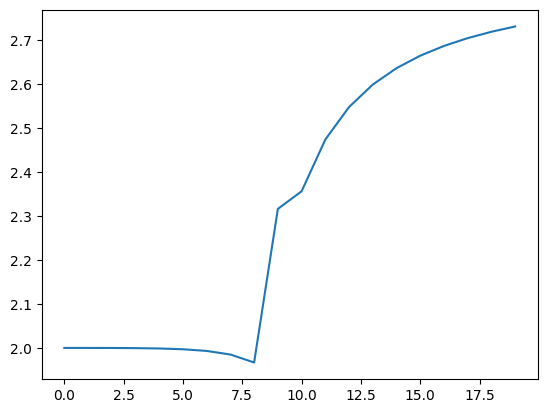

In [151]:
plt.plot(singular_vals[1:])

In [155]:
def string_order_exp(psi):
    width = 80
    index = (psi.L - width)//2
    exp = psi.expectation_value_multi_sites([to_npc_array(np_X),]*width, index)
    return exp

In [156]:
string_order_exp(psi_dict[0])

array(-7.00786286e-35)

In [157]:
string_orders = [string_order_exp(psi) for psi in psi_dict.values()]

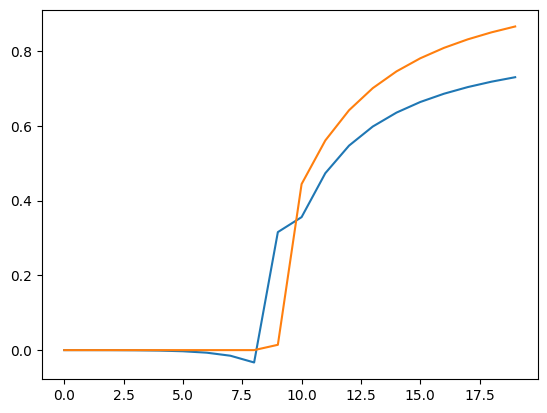

In [160]:
plt.plot(np.array(singular_vals[1:]) -2)
plt.plot(np.array(string_orders[1:]))

There could be a pattern here, but would need to calculate for larger values of B to be sure.

# Conclusions and questions
* Degeneracy in schmidt values arising from entanglement entropy spectrum degeneracy, likely affecting other effects also
* Pollman predicts that the transfer matrices should have a single largest eigenvalue with modulus 1, but this is not what's seen here for certain symmetry actions. Due to a lack of translation invariance?
* The SVD approximation seems to be better in general.
* The dominant singular value seems closely related to the "all X" string order parameter. Coincidence? Try to explain? Seems bond dimension dependent. That the singular value would emerge in the string order calculation is not surprising, from a practical calculation point of view. That the numbers match implies the left and right singualar vectors match the string order in some sense.
* The "symmetric" gauge for the symmetry operation seems to be more useful (?) and more accurate.
    * The only difference between the symmetric and B gauges is an
* I need to dig into the symmetry projected states more, lots of info there but need to tease out more.